# KMeans Clustering

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Dog Horse KMeans Challenge

In [57]:
# Import Data
df_dh = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv")
# We picked variables that we need
X = df_dh[['height', 'weight']]
df_dh.head()

,height,weight,target,type
0,27.0,71.0,0.0,dog
1,27.0,92.0,0.0,dog
2,32.0,47.0,0.0,dog
3,30.0,90.0,0.0,dog
4,28.0,91.0,0.0,dog


In [25]:
# Scale Data
features_df_dh = df_dh[['height', 'weight']]
scaler = StandardScaler()

# Fit & transform data.
features_df_dh = pd.DataFrame(scaler.fit_transform(features_df_dh), columns=['height', 'weight'])


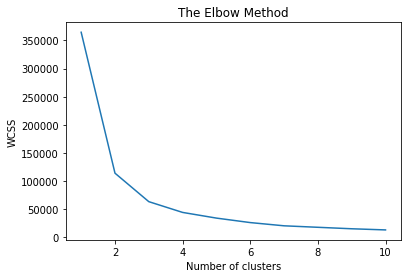

In [78]:
# Create Elbow Plot
wcss = []
# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 



In [27]:
# Apply KMeans and Plot KMeans Results and Actual Results
kmean = KMeans(n_clusters=2, init='k-means++')

kmean_preds = kmean.fit_predict(features_df_dh)

In [29]:
# Cluster centeriods
print(kmean.cluster_centers_)

[[ 0.96628215  0.91732732]
 [-0.74395174 -0.70626086]]


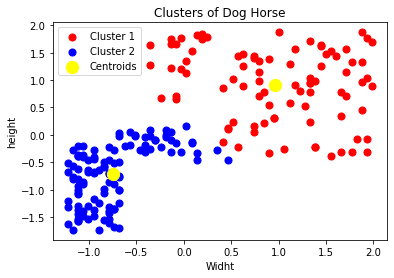

In [50]:
# Plot the clusters
plt.scatter(features_df_dh.iloc[kmean_preds == 0, 0], features_df_dh.iloc[kmean_preds == 0, 1], s = 50, c = 'red', label = 'Cluster 1')

plt.scatter(features_df_dh.iloc[kmean_preds == 1, 0], features_df_dh.iloc[kmean_preds == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')


plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Dog Horse')
plt.xlabel('Widht')
plt.ylabel('height')
plt.legend()
plt.show()

In [59]:
# assign the y_kmeans to a new column
df_dh['y_kmeans'] = kmean_preds
df_dh.head()

,height,weight,target,type,y_kmeans
0,27.0,71.0,0.0,dog,1
1,27.0,92.0,0.0,dog,1
2,32.0,47.0,0.0,dog,1
3,30.0,90.0,0.0,dog,1
4,28.0,91.0,0.0,dog,1


In [60]:
# replace dog with 1 and horse with 0 to help us caluclate the Accuracy Score
df_dh.replace({'dog': 1, 'horse': 0}, inplace=True)
df_dh.head()


,height,weight,target,type,y_kmeans
0,27.0,71.0,0.0,1,1
1,27.0,92.0,0.0,1,1
2,32.0,47.0,0.0,1,1
3,30.0,90.0,0.0,1,1
4,28.0,91.0,0.0,1,1


1

In [63]:
# Calculate the number of correct predictions
corrects = 0
for i in range(len(df_dh)):
  if df_dh.type.iloc[i] == df_dh.y_kmeans[i]:
    corrects += 1

print("Correct Predictions : ", corrects)

Correct Predictions :  187


In [65]:
# Compute Accuracy Score of KMean Labels with True Labels
print("Acurracy: ", accuracy_score(df_dh.type, df_dh.y_kmeans))

Acurracy:  0.935


# Seattle Weather KMeans Challenge

In [84]:
df_sea = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/seattle_weather_1948-2017.csv")
X_sea = df_sea[['tmax', 'tmin']]
df_sea.head()

,ds,prcp,tmax,tmin,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [85]:
df_sea.dropna(inplace=True)

In [86]:
# Scale Data
features_df_sea = df_sea.drop(['ds', 'rain'], axis=1)
# Fit & transform data.
features_df_sea = pd.DataFrame(scaler.fit_transform(features_df_sea), columns=['prcp', 'tmax', 'tmin'])

Text(0.5, 1.0, 'The Elbow Method')

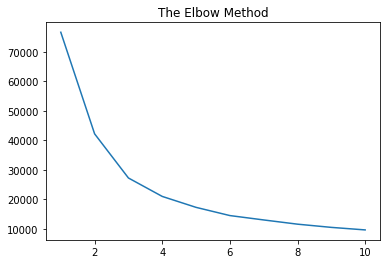

In [122]:
# Create Elbow Plot
wcss = []
# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_df_sea)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 



In [ ]:
# Apply KMeans and Plot KMeans Results and Actual Results


In [93]:
kmean = KMeans(n_clusters=2)
kmean.fit(features_df_sea)
kmean_preds = kmean.predict(features_df_sea)
kmean_preds

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [96]:
# Assign the y_kmeans to a new column
df_sea['y_kmeans'] = kmean_preds
df_sea.head()

,ds,prcp,tmax,tmin,rain,y_kmeans
0,1948-01-01,0.47,51,42,True,1
1,1948-01-02,0.59,45,36,True,1
2,1948-01-03,0.42,45,35,True,1
3,1948-01-04,0.31,45,34,True,1
4,1948-01-05,0.17,45,32,True,1


In [98]:
# Replace True with 1 and False with 0 to help us caluclate the Accuracy Score
df_sea.replace({True: 1, False: 0}, inplace=True)
df_sea.head()

,ds,prcp,tmax,tmin,rain,y_kmeans
0,1948-01-01,0.47,51,42,1,1
1,1948-01-02,0.59,45,36,1,1
2,1948-01-03,0.42,45,35,1,1
3,1948-01-04,0.31,45,34,1,1
4,1948-01-05,0.17,45,32,1,1


In [108]:
# Calculate the number of correct predictions
corrects = 0
for i in range(len(df_sea)):
  if df_sea.rain.iloc[i] == df_sea.y_kmeans.iloc[i]:
    corrects += 1
print("Correct Predictions: ", corrects)

Correct Predictions:  16942


In [110]:
# Compute Accuracy Score of KMean Labels with True Labels
print("Accuracy:", accuracy_score(df_sea.rain, df_sea.y_kmeans))

Accuracy: 0.6631438860184751


# Random Blob KMeans Challenge

- You dont have true labels for this data so this is truly an unsupervised dataset
- The blobs are randomly generated every time you run the cell and their characteristics are:
    - 2000-4000 data points
    - 10-30 blobs created

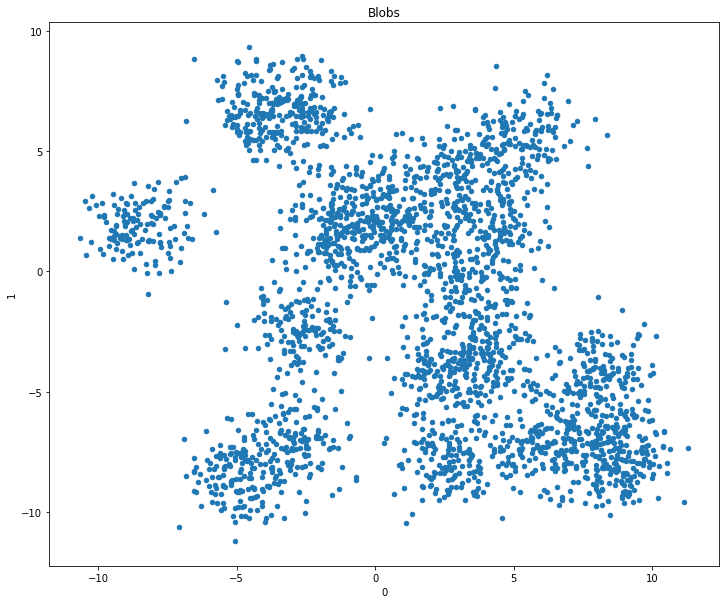

In [113]:
df_blob = pd.DataFrame(make_blobs(random.randint(2000,4000), centers=random.randint(10,30))[0])
df_blob.plot(kind="scatter", x=0, y=1, title="Blobs", figsize=(12,10));

In [117]:
# Scale Data
# Fit & transform data.
df_blob = pd.DataFrame(scaler.fit_transform(df_blob))
df_blob.head()

,0,1
0,-1.104045,-1.443879
1,-0.569939,0.860896
2,-1.092722,1.524529
3,-1.452844,-1.578017
4,-0.826804,-1.143331


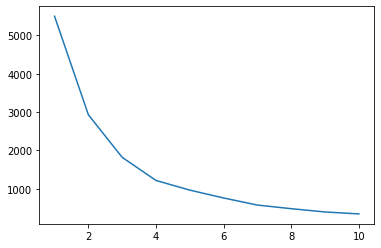

In [121]:
# Create Elbow Plot
wcss = []
# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_blob)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)

# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 



From the plot we can see that the optimal number of clusters in 7, because at this point its a good trade off between *wcss* and run time.

In [124]:
# Apply KMeans and Plot KMeans Results and Actual Results
kmean = KMeans(n_clusters=7, init='k-means++')
kmean_preds = kmean.fit_predict(df_blob)

In [126]:
df_blob['y_kmeans'] = kmean_preds
df_blob.head()

,0,1,y_kmeans
0,-1.104045,-1.443879,5
1,-0.569939,0.860896,2
2,-1.092722,1.524529,1
3,-1.452844,-1.578017,5
4,-0.826804,-1.143331,5


**Ploting clusters**

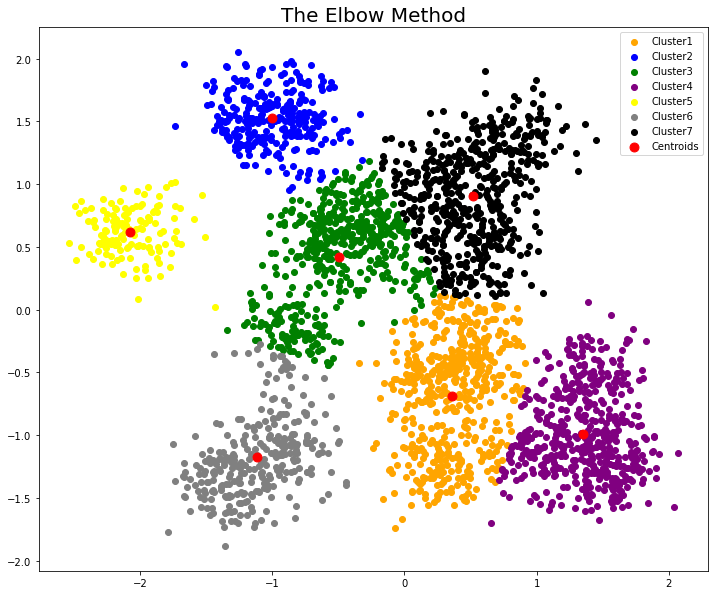

In [159]:
plt.figure(figsize=(12,10))
plt.scatter(df_blob.iloc[kmean_preds == 0, 0], df_blob.iloc[kmean_preds == 0, 1], color = 'orange', label='Cluster1')
plt.scatter(df_blob.iloc[kmean_preds == 1, 0], df_blob.iloc[kmean_preds == 1, 1], color = 'blue', label='Cluster2')
plt.scatter(df_blob.iloc[kmean_preds == 2, 0], df_blob.iloc[kmean_preds == 2, 1], color = 'green', label='Cluster3')
plt.scatter(df_blob.iloc[kmean_preds == 3, 0], df_blob.iloc[kmean_preds == 3, 1], color = 'purple', label='Cluster4')
plt.scatter(df_blob.iloc[kmean_preds == 4, 0], df_blob.iloc[kmean_preds == 4, 1], color = 'yellow', label='Cluster5')
plt.scatter(df_blob.iloc[kmean_preds == 5, 0], df_blob.iloc[kmean_preds == 5, 1], color = 'gray', label='Cluster6')
plt.scatter(df_blob.iloc[kmean_preds == 6, 0], df_blob.iloc[kmean_preds == 6, 1], color = 'black', label='Cluster7')

plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], color = 'red', s=80, label='Centroids')
plt.legend()
plt.title('The Elbow Method',  fontdict={'size': 20})
plt.show()